# **British Airways - Data Science - Job Stimulation (Python)** 

## **Introduction**
* British Airways (BA) is the national airline of the United Kingdom (UK) and operates numerous daily flights worldwide.
* Managing the entire flight process, from scheduling to customer service, is a complex and vital responsibility.
* As a data scientist at BA, the role involves leveraging analytical skills to impact multimillion-pound decisions, optimizing operations, and enhancing revenue.
* Customer interactions with BA are numerous and critical to business success, necessitating an understanding of their sentiments, needs, and feedback.
* The initial task involves gathering and analyzing customer feedback from a third-party source to extract valuable insights.

## **Aim and Objective**

* This project involves carrying out two tasks: 
    * Task 1: Web Scraping for Company Insights
    * Task 2: 
* The task 1 involves web scraping and analysing customer review data to uncover findings for British Airways

#### *Loading the required packages*

In [1]:
# For web scraping 
import requests
from bs4 import BeautifulSoup

# For data manipulation
import pandas as pd
import numpy as np

## **Task 1: Web scraping to gain company insights**

### **Scrape data from the web**

* Collect data from the web, particulary focus on reviews related to the British Airways and the [airline](https://www.airlinequality.com/airline-reviews/british-airways) itself, utilizing the [Skytrax](https://www.airlinequality.com) website.
* Maxmise the text review data collection from this website using `BeutifulSoup` for improved analysis.

#### *Web Scraping*
The following code goes through multiple pages (controlled by the pages variable) and collects a specified number of reviews per page (controlled by the page_size variable).

In [2]:
# defining the base URL for the British Airways reviews on the website.
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# To indicate how many pages of reviews we want to scrape
pages = 10
# To define how many reviews to collect per page. Each page will have a maximum of 100 reviews.
page_size = 100

# This initialises an empty list called reviews to store the collected reviews.
reviews = []

# The for loop iterates from 1 to the pages + 1 (i.e., from 1 to 11 in this case, since pages is 10).
for i in range(1, pages + 1):
    
    # prints a message indicating which page is currently being scraped.
    print(f"Scraping page {i}")

    # Constructs the URL for the current page to scrape. 
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page (Sends an HTTP GET request to the constructed URL to retrieve the page's HTML content)
    response = requests.get(url)

    # Parse content
    # Extracts the HTML content from the HTTP response.
    content = response.content
    # The `BeautifulSoup` function is used to parse the HTML content of the page (to parse; to analyze and extract structured information from unstructured data)
    parsed_content = BeautifulSoup(content, 'html.parser')
    # Iterates through all the HTML elements with the tag <div> and the class "text_content." These elements typically contain the review text.
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        # To extracts the text content of each review and appends it to the reviews list.
        reviews.append(para.get_text())
    
    #prints the total number of reviews collected so far after scraping the current page.
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Quick view of the review we web scraped
print(type(reviews))
print(reviews)

<class 'list'>
["Not Verified |  Everything was ok until our connecting flight in London, just before take off, we were on the runway, the pilot came on to announce an engine problem. After engineers tried to fix it while we waited on the plane for over an hour we were finally told that we would have to be evacuated and rebooked for another flight but not to worry because a special crew was waiting for us on the ground to help us and set us up in a hotel except that there was no one to help us. In fact everyone refused to help us. It was Saturday almost 8pm and they just wanted to go home. Anyone with a connecting flight couldn't rebook on the application because the app wouldn't disassociate our first flight with the connecting one in London and the staff saw this but still refused to help us. They gave us a phone number but there was only a message that said just to use the app. Finally I got someone on the phone who rebooked us for the next day. Now it's 10:30pm and I have to find a

* As the list is not very versatile, let's convert into a dataframe:

In [4]:
# Creating an empty dataframe
df = pd.DataFrame()
# transfering the review list into the data frame under a column called "reviews"
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...


* Write and Save the dataframe into the folder called 'Data'

In [5]:
df.to_csv("Data/BA_reviews.csv")

### **Data Quality Analysis**

#### **Loading the data**

* Load the data into a new variable as new changes will be made

In [2]:
df_new = pd.read_csv("Data/BA_reviews.csv", index_col=None)
# View the first 5 rows
df_new.head()

,Unnamed: 0,reviews
0,0,Not Verified | Everything was ok until our co...
1,1,Not Verified | My initial flight was cancelle...
2,2,Not Verified | We will never fly British Airw...
3,3,✅ Trip Verified | Check in and security cleara...
4,4,Not Verified | British Airways has confirmed ...


#### **Data Cleaning and Preparation**

* Quick view of the data

In [3]:
# Overview of a DataFrame (Equivalent to summary() in R):
print(df_new.describe())
print("")

# Structure of a DataFrame (Equivalent to str() in R):
print(df_new.info())

        Unnamed: 0
count  1000.000000
mean    499.500000
std     288.819436
min       0.000000
25%     249.750000
50%     499.500000
75%     749.250000
max     999.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


* The first column is a repeat index column; let's remove this column so we just have the reviews column

In [4]:
# Remove the 'Unnamed: 0' column
df_new = df_new.drop(columns=['Unnamed: 0'])

# Now the DataFrame will no longer have the 'Unnamed: 0' column
df_new.head()

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...


* Let's now remove the first part of the reviews ("✅ Trip Verified |" and "Not Verified |" including the following "|")

In [5]:
# Remove "✅ Trip Verified |" and "Not Verified |" including the following "|"
df_new['reviews'] = df_new['reviews'].str.replace('✅ Trip Verified \|', '').str.replace('Not Verified \|', '')

# Now the "reviews" column will have these characters and "|" removed
df_new.head()

/var/folders/18/757wgvw17hn8_6yn6nkg5twm0000gn/T/ipykernel_6318/31251927.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new['reviews'] = df_new['reviews'].str.replace('✅ Trip Verified \|', '').str.replace('Not Verified \|', '')


,reviews
0,Everything was ok until our connecting fligh...
1,My initial flight was cancelled 8 hours prio...
2,We will never fly British Airways again. Our...
3,Check in and security clearance very quick at...
4,British Airways has confirmed itself as the ...


* To further prepare the text for sentiment analysis, can perform the following text preprocessing steps to the "reviews" column:
    * Lowercasing: Convert all text to lowercase to ensure consistency and reduce the impact of case variations on sentiment analysis.
    * Removing Punctuation: Remove punctuation marks such as periods, commas, and exclamation points, as they typically do not carry sentiment information.
    * Tokenization: Split the text into individual words or tokens. Tokenization makes it easier to analyze and process the text.
    * Removing Stop Words: Remove common stop words like "and," "the," "is," etc. These words are frequent but often don't carry significant sentiment information.
    * Lemmatization or Stemming: Reduce words to their base or root form. This can help in reducing the dimensionality of the data and capturing the core meaning of words. You can choose either lemmatization (which preserves the word's meaning) or stemming (which truncates words to their root form).
    
    (* Handling Numbers and Special Characters: Decide whether to keep or remove numbers and special characters based on their relevance to sentiment analysis.)

* Importing Libraries: In this section, Python libraries necessary for text preprocessing are imported:
    * pandas for working with DataFrames.
    * nltk (Natural Language Toolkit) for natural language processing tasks.
    * Specific modules and resources from NLTK are also imported.

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [20]:
# Download NLTK data (if not already downloaded)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/hawra.n/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hawra.n/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hawra.n/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##### *Lowercasing*
* To converts all the text in the "reviews" column to lowercase. 
* It ensures that the text is consistent in terms of case, which helps in making text analysis case-insensitive.

In [7]:
# 1. Lowercasing
df_new['reviews'] = df_new['reviews'].str.lower()
df_new.head()

,reviews
0,everything was ok until our connecting fligh...
1,my initial flight was cancelled 8 hours prio...
2,we will never fly british airways again. our...
3,check in and security clearance very quick at...
4,british airways has confirmed itself as the ...


##### *Removing Punctuation*

* Here, a `lambda` function is used to iterate over each character in each string of the "reviews" column and remove any character that is in the `string.punctuation` set (which includes characters like periods, commas, exclamation points, etc.). 
* The result is a string with punctuation removed.

In [8]:
# 2. Removing Punctuation

# Here's a more detailed explanation:
  # 1) df_new['reviews']: This part of the code specifies the DataFrame (df_new) and the column ('reviews') on which to apply the operation. 
    # It selects the "reviews" column where the text data is stored.
  # 2) .apply(lambda x: ... ): The .apply() method is used to apply a function to each element of the selected column. 
    # In this case, it's a lambda function that takes each text element x from the "reviews" column as input.
  # 3) ''.join([char for char in x if char not in string.punctuation]):
    # [char for char in x if char not in string.punctuation]: This part creates a list comprehension that iterates through each character char in the input text x. 
    # It checks if char is not in the set of punctuation characters string.punctuation. If a character is not in string.punctuation, it is included in the list.
    # ''.join(...): After creating the list of characters with punctuation removed, this code joins the characters back together into a single string using the join() method. 
    # The join() method concatenates the characters without any spaces between them.
df_new['reviews'] = df_new['reviews'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_new.head()

,reviews
0,everything was ok until our connecting fligh...
1,my initial flight was cancelled 8 hours prio...
2,we will never fly british airways again our ...
3,check in and security clearance very quick at...
4,british airways has confirmed itself as the ...


##### *Tokenization*
* In this step, a `lambda` function is used to tokenize each string in the "reviews" column. 
* The `word_tokenize()` function from NLTK is applied to break each string into individual words or tokens. 
* The result is a list of tokens for each review.

In [9]:
# 3. Tokenization
df_new['reviews'] = df_new['reviews'].apply(lambda x: word_tokenize(x))
df_new.head()

,reviews
0,"[everything, was, ok, until, our, connecting, ..."
1,"[my, initial, flight, was, cancelled, 8, hours..."
2,"[we, will, never, fly, british, airways, again..."
3,"[check, in, and, security, clearance, very, qu..."
4,"[british, airways, has, confirmed, itself, as,..."


##### *Removing Stop Words*

* First, a set of English stop words is created using stopwords.words('english'). 
* Then, a lambda function is applied to remove any words from the tokenized list that are found in the stop words set. 
* This step eliminates common words like "the," "and," "is," etc., which typically do not carry significant meaning.

In [10]:
# 4. Removing Stop Words
stop_words = set(stopwords.words('english'))
df_new['reviews'] = df_new['reviews'].apply(lambda x: [word for word in x if word not in stop_words])

df_new.head()

,reviews
0,"[everything, ok, connecting, flight, london, t..."
1,"[initial, flight, cancelled, 8, hours, prior, ..."
2,"[never, fly, british, airways, flight, july, 1..."
3,"[check, security, clearance, quick, lhr, t5, w..."
4,"[british, airways, confirmed, worst, airline, ..."


##### *Lemmatization*

* The code creates a `WordNetLemmatizer` object from NLTK. 
* Then, a `lambda` function is applied to lemmatize each word in the tokenized list. 
* Lemmatization reduces words to their base or dictionary form, preserving their meaning. 
* In this case, the lemmatization is applied to all words in the text.
------
* stemming is a faster and more aggressive technique that might produce non-words but is suitable for some applications where linguistic accuracy is not critical. 
* lemmatization is a more linguistically accurate technique that produces valid words but may be slower and more resource-intensive due to dictionary lookups and morphological analysis.
* For more accuracy, lemmatiszation is used

In [11]:
# 5. Lemmatization 
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
df_new['reviews'] = df_new['reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_new.head()

[nltk_data] Downloading package omw-1.4 to /Users/hawra.n/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,reviews
0,"[everything, ok, connecting, flight, london, t..."
1,"[initial, flight, cancelled, 8, hour, prior, f..."
2,"[never, fly, british, airway, flight, july, 15..."
3,"[check, security, clearance, quick, lhr, t5, w..."
4,"[british, airway, confirmed, worst, airline, u..."


##### *Joining Tokens* 
* Finally, a `lambda` function is used to join the lemmatized words (tokens) back into sentences. 
* This step converts the list of tokens back into a single string for each review.

In [12]:
# 6. Join tokens back into sentences
df_new['reviews'] = df_new['reviews'].apply(lambda x: ' '.join(x))
df_new.head()

,reviews
0,everything ok connecting flight london take ru...
1,initial flight cancelled 8 hour prior flight a...
2,never fly british airway flight july 15 2023 l...
3,check security clearance quick lhr t5 wife use...
4,british airway confirmed worst airline uk last...


### **Sentimental Analysis**

* The text data has been successfully preprocess to now perform sentimental analysis.
---
* Sentiment analysis uses natural language processing (NLP) techniques to determine the sentiment (positive, negative, or neutral) expressed in text data. 
* Will perform VADER (Valence Aware Dictionary and Sentiment Reasoner), a sentiment analysis tool grounded in rules and trained on the rich landscape of social media language.
* Rule-based sentiment analysis is a method within the field of sentiment analysis, also referred to as opinion mining. 
    * It hinges on the utilisation of predefined rules or linguistic patterns to ascertain the sentiment or emotional disposition conveyed in a given text. 
    * In contrast to machine learning-based sentiment analysis, which derives insights from data, rule-based sentiment analysis relies on human-crafted rules and heuristics to predict sentiment.

#### **Creating and Adding Sentiment Scores to Dataset**

##### *Perform the VADER Sentiment Analysis to Retrieve and Add the Scores*

In [13]:
# porting the Sentiment Analysis Tool: This line imports the SentimentIntensityAnalyzer class from the vaderSentiment library. 
# VADER is a rule-based sentiment analysis tool commonly used to assess sentiment in text.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
# An instance of the SentimentIntensityAnalyzer class is created and assigned to the variable sentiment. 
# This instance will be used to analyze the sentiment of the text "reviews".
sentiment = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'reviews' column and store the results in a new column called 'sentiment_scores'
# The sentiment.polarity_scores() method is used to analyze the sentiment of each text sample. 
# It returns a dictionary containing four sentiment scores:
    # 'neg': Negative sentiment score.
    # 'neu': Neutral sentiment score.
    # 'pos': Positive sentiment score.
    # 'compound': A compound score that represents the overall sentiment, where a positive value indicates positive sentiment, a negative value indicates negative sentiment, and values closer to zero represent neutral sentiment.
df_new['sentiment_scores'] = df_new['reviews'].apply(lambda x: sentiment.polarity_scores(x))

# Extract positive, negative, and neutral scores
df_new['positive_score'] = df_new['sentiment_scores'].apply(lambda x: x['pos'])
df_new['negative_score'] = df_new['sentiment_scores'].apply(lambda x: x['neg'])
df_new['neutral_score'] = df_new['sentiment_scores'].apply(lambda x: x['neu'])


# Let's also extract specific sentiment scores, component and save it into a new column, called 'compound_score'
df_new['compound_score'] = df_new['sentiment_scores'].apply(lambda x: x['compound'])

In [14]:
# Quick view of the changes made
df_new.head()

,reviews,sentiment_scores,positive_score,negative_score,neutral_score,compound_score
0,everything ok connecting flight london take ru...,"{'neg': 0.176, 'neu': 0.687, 'pos': 0.137, 'co...",0.137,0.176,0.687,-0.8507
1,initial flight cancelled 8 hour prior flight a...,"{'neg': 0.165, 'neu': 0.793, 'pos': 0.042, 'co...",0.042,0.165,0.793,-0.8481
2,never fly british airway flight july 15 2023 l...,"{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'comp...",0.000,0.209,0.791,-0.6808
3,check security clearance quick lhr t5 wife use...,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.205,0.000,0.795,0.9081
4,british airway confirmed worst airline uk last...,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",0.000,0.157,0.843,-0.6249


##### *Label the Compound Scores*

* To determine whether the overall sentiment in the 'compound_score' column is positive, neutral, or negative, you can set up a simple threshold-based classification. Here's a common approach:

    * If the 'compound_score' is `greater than 0.05`, you can classify it as `positive`.
    * If the 'compound_score' is `between -0.05 and 0.05`, you can classify it as `neutral`.
    * If the 'compound_score' is `less than -0.05`, you can classify it as `negative`.

In [15]:
# Define a function to classify sentiment
def classify_sentiment(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif -0.05 <= compound_score <= 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment classification function to the 'compound_score' column
df_new['sentiment_label'] = df_new['compound_score'].apply(classify_sentiment)

# Now, 'sentiment_label' column contains the sentiment classification

In [16]:
df_new.head()

,reviews,sentiment_scores,positive_score,negative_score,neutral_score,compound_score,sentiment_label
0,everything ok connecting flight london take ru...,"{'neg': 0.176, 'neu': 0.687, 'pos': 0.137, 'co...",0.137,0.176,0.687,-0.8507,Negative
1,initial flight cancelled 8 hour prior flight a...,"{'neg': 0.165, 'neu': 0.793, 'pos': 0.042, 'co...",0.042,0.165,0.793,-0.8481,Negative
2,never fly british airway flight july 15 2023 l...,"{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'comp...",0.000,0.209,0.791,-0.6808,Negative
3,check security clearance quick lhr t5 wife use...,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.205,0.000,0.795,0.9081,Positive
4,british airway confirmed worst airline uk last...,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",0.000,0.157,0.843,-0.6249,Negative


### **Exploratory Data Analysis**

Let's Get an overview of the dataset

In [17]:
print(df_new.describe())
print()
print(df_new.info())

       positive_score  negative_score  neutral_score  compound_score
count     1000.000000     1000.000000    1000.000000     1000.000000
mean         0.169802        0.112882       0.717292        0.169786
std          0.128062        0.085427       0.109520        0.744321
min          0.000000        0.000000       0.274000       -0.993800
25%          0.075000        0.051000       0.652000       -0.648600
50%          0.136000        0.101000       0.728500        0.401900
75%          0.241000        0.159000       0.795000        0.919475
max          0.726000        0.463000       1.000000        0.998300

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviews           1000 non-null   object 
 1   sentiment_scores  1000 non-null   object 
 2   positive_score    1000 non-null   float64
 3   negative_score    1000 non-null  

In [18]:
print(df_new['sentiment_label'].value_counts())

Positive    565
Negative    414
Neutral      21
Name: sentiment_label, dtype: int64


Let's visual 'compound_score' in the form of boxplot

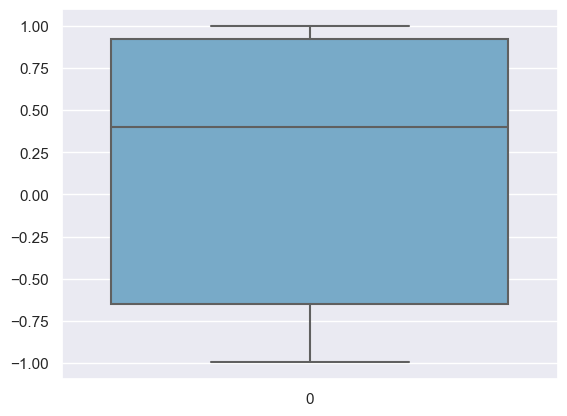

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.boxplot(df_new["compound_score"], palette="Blues")
plt.show()

let's visualise the frequency of the sentiment labels:

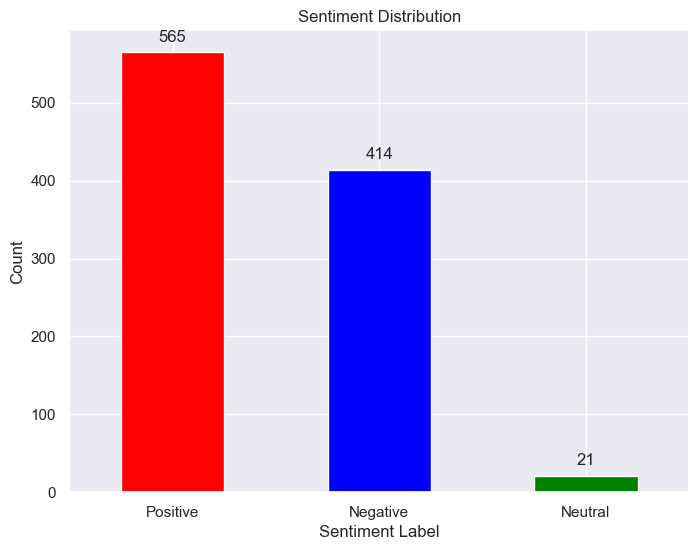

In [20]:
# Count the number of reviews for each sentiment label
sentiment_counts = df_new['sentiment_label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add count numbers above each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

Out of the 1000 reviews:
* 565 were positive reviews
* 414 were negative reviews
* 21 were neutral reviews

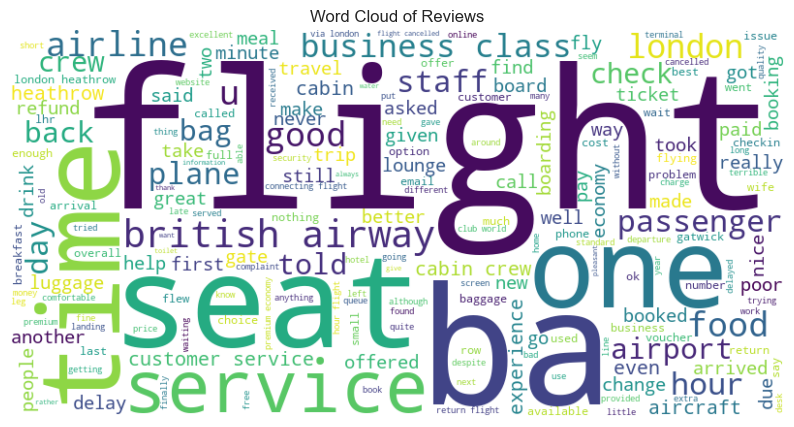

In [21]:
from wordcloud import WordCloud

# Combine all cleaned reviews into a single string
combined_text = ' '.join(df_new['reviews'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

- these don't provide that much powerful insights, will perform some in-depth EDA to get some further insights

##### *Sentiment Distribution by Sentiment Label*

* Creating a stacked bar plots to visualise the distribution of sentiments within each sentiment label category based on the strength of sentiments.
* This can help you understand how many positive/negative/neutral reviews have strong or weak sentiments

In [22]:
# Group the data by 'sentiment_label' and count the number of reviews in each category
    # group the df_new by the 'sentiment_label' column using the .groupby() method. 
    # This groups the data into categories based on the sentiment labels (Positive, Negative, Neutral).
    # Within each sentiment label category, we calculate the sum of positive, negative, and neutral scores using the .agg() method. 
    # This aggregation step totals the scores for each sentiment type within each label category.

sentiment_distribution = df_new.groupby('sentiment_label').agg({
    'positive_score': 'sum',
    'negative_score': 'sum',
    'neutral_score': 'sum'
}).reset_index()

# Create stacked bar plots
    # To visualize the distribution of sentiments within each sentiment label category based on the strength of sentiments.
    # The set_index('sentiment_label') line sets the 'sentiment_label' as the index of the DataFrame to prepare it for plotting.
    # The .T transposes the DataFrame, switching rows and columns, making it suitable for plotting.
    # We use .plot(kind='bar', stacked=True) to create a stacked bar plot. 
        # The stacked=True parameter stacks the bars for each sentiment type (positive, negative, neutral) on top of each other within each sentiment label category.
    # The rest of the code is for adding titles, labels, legends, and formatting the plot for readability.
# plt.figure(figsize=(10, 6))
# sentiment_distribution.set_index('sentiment_label').T.plot(kind='bar', stacked=True)
# plt.title('Stacked Sentiment Distribution by Sentiment Label and Strength')
# plt.xlabel('Sentiment Strength')
# plt.ylabel('Number of Reviews')
# plt.xticks(rotation=0)
# plt.legend(title='Sentiment Label', loc='upper left', labels=sentiment_distribution['sentiment_label'])
# plt.show()

In [23]:
sentiment_distribution.head()

,sentiment_label,positive_score,negative_score,neutral_score
0,Negative,29.185,75.295,309.508
1,Neutral,2.477,2.448,16.076
2,Positive,138.140,35.139,391.708


##### *Let's plot the sentiment_distribution*

---

Perform the following Steps:
This code first calculates the total score for each sentiment label, sorts the DataFrame by the total score in descending order, and then drops the 'total_score' column before creating the stacked bar plot. This will result in a plot where the bars are arranged from largest to smallest without showing the total_score.
1. Calculates the total score for each sentiment label, sorts the DataFrame by the total score in descending order. Then drops the 'total_score' column before creating the stacked bar plot. 
   * This will result in a plot where the bars are arranged from largest to smallest without showing the total_score.
2. Create and plot the Stack Bar Plots
   * set a custom color palette using the sns.set_palette method.
   * Create a stacked bar plot using sentiment_distribution.plot and set stacked=True to create a stacked plot.
   * Additional customization is applied to the plot, such as adding labels and a title.

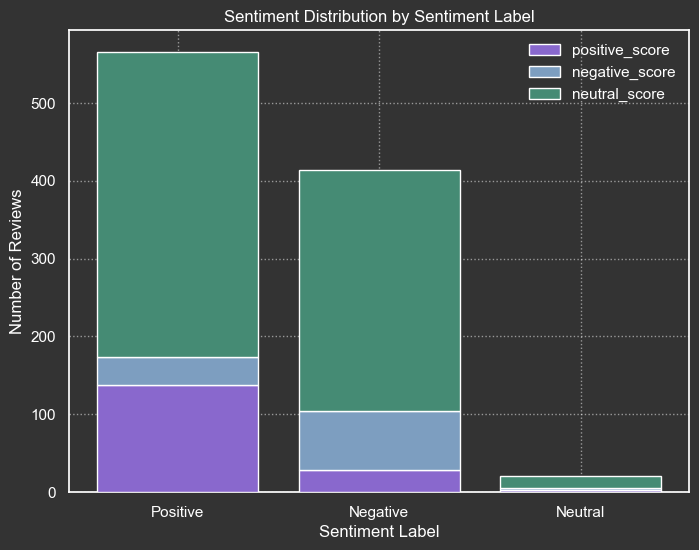

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# # Your dataset
# data = {
#     'sentiment_label': ['Negative', 'Neutral', 'Positive'],
#     'positive_score': [138.140, 2.477, 29.185],
#     'negative_score': [35.139, 2.448, 75.295],
#     'neutral_score': [391.708, 16.076, 309.508]
# }

sentiment_distribution = pd.DataFrame(sentiment_distribution)

# Define colors
colors = ['#8968CD', '#7D9EC0', '#458B74']

# Create a figure with dark grey background
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('#333333')  # Dark grey background for the entire figure

# Set background color
ax.set_facecolor('#333333')  # Dark grey background for the axes

# Stack the bar chart from largest to smallest
sentiment_distribution = sentiment_distribution.sort_values(by='positive_score', ascending=False)

# Plot the stacked bars with solid colors
bottom = [0] * len(sentiment_distribution)
for col, color in zip(sentiment_distribution.columns[1:], colors):
    ax.bar(sentiment_distribution['sentiment_label'], sentiment_distribution[col], bottom=bottom, color=color, label=col, zorder=3)  # Higher zorder to layer above grid
    bottom = [sum(x) for x in zip(bottom, sentiment_distribution[col])]

# Set labels and title
ax.set_xlabel('Sentiment Label', color='white')
ax.set_ylabel('Number of Reviews', color='white')
ax.set_title('Sentiment Distribution by Sentiment Label', color='white')

# Customize ticks and labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Remove vertical grid lines and set horizontal grid lines to white
# Customize the grid lines
ax.grid(True, axis='y', linestyle='dotted', alpha=0.5, color='white')
ax.xaxis.grid(True, linestyle='dotted', alpha=0.5, color='white')

# Legend with white text
ax.legend(loc='upper right', frameon=False)
legend = ax.get_legend()
for text in legend.get_texts():
    text.set_color('white')

# Show the plot
plt.show()

* We can see that neutral sentiment plays big part in each of overall compound sentimental scores.
* For example, neutral score plays a big part towards the overall postive sentiment scores, there is good amount of positve scores, but there is more neutral scores. This is the same case with the overall negative and neutral sentiment scores.
* This maybe an indication that the neutral scores or neutral words are affecting what reviews words are really positive or negative.

##### *Word Frequency Analysis*

* While we have created a word cloud to visualize common words, we will can perform a more detailed analysis of word frequency. 
* This involves calculating the frequency of each word and create a bar plot or a word frequency distribution plot to see which words appear most often in positive, negative, or neutral reviews.
* This will also further help to understand the 'Sentiment Distribution by Sentiment Label' stacked bar plot, and to really see how the neutral scores or neutral words may be affecting what reviews words are could really be positive or negative.

---

To perform Word Frequency Analysis on this preprocessed text, will perform the following steps:

1. Count Word Frequencies: Count word frequencies directly from the preprocessed text. (Remember the tokenization and lemmatization steps have already prepared the text for analysis).
2. Filter Stop Words: If you haven't already done so, you can filter out common stop words from your text data to focus on meaningful words. You can use NLTK's stop words list or any other predefined list.
3. Analyze by Sentiment: If you want to analyze word frequencies based on sentiment labels, you can filter the preprocessed text for each sentiment label (positive, negative, or neutral) and calculate word frequencies separately.

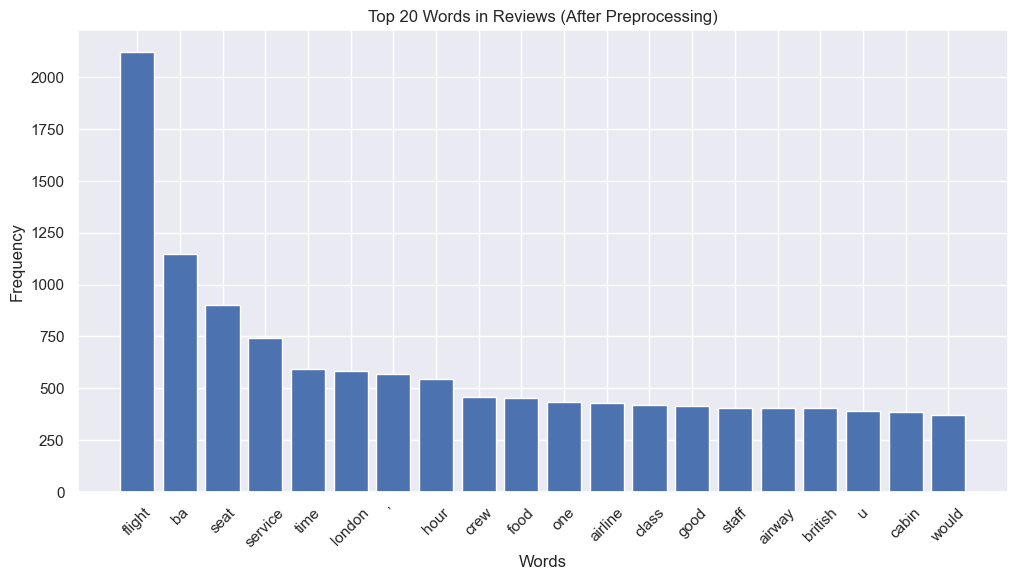

In [30]:
from collections import Counter
import matplotlib.pyplot as plt

# Function to count word frequencies
def count_word_frequencies(text):
    word_list = ' '.join(text).split()
    word_freq = Counter(word_list)
    return word_freq

# Count word frequencies for the entire dataset
word_freq = count_word_frequencies(df_new['reviews'])

# Get the most common words and their frequencies
top_words = word_freq.most_common(20)

# Separate words and frequencies for plotting
words, frequencies = zip(*top_words)

# Plot the word frequency distribution for the entire dataset
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)  # Display the top 20 words
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Reviews (After Preprocessing)')
plt.xticks(rotation=45)
plt.show()

In [31]:
print(top_words)

[('flight', 2120), ('ba', 1146), ('seat', 902), ('service', 744), ('time', 595), ('london', 585), ('’', 570), ('hour', 543), ('crew', 458), ('food', 455), ('one', 432), ('airline', 427), ('class', 419), ('good', 413), ('staff', 407), ('airway', 406), ('british', 405), ('u', 389), ('cabin', 388), ('would', 372)]


It seem that there are still irrelavent words that could be having an affect on the overall sentiment analysis

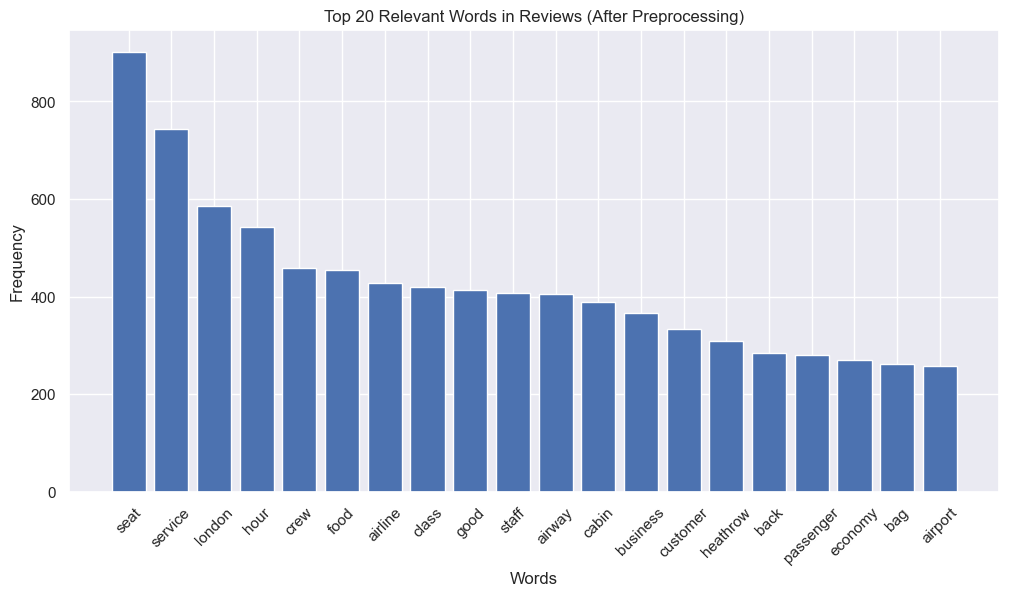

In [33]:
from collections import Counter
import matplotlib.pyplot as plt
import re

# Custom list of additional stop words
custom_stop_words = set([
    'ba', 'flight', 'time', 'airways', 'british', 'one', 'u', 'would', ',' ,"", "get", "could", "day", 
    # Add more domain-specific stop words here
])

# Function to count word frequencies and remove custom stop words
def count_word_frequencies(text):
    # Remove punctuation and split the text into words
    words = re.findall(r'\b\w+\b', ' '.join(text))
    
    # Count word frequencies while excluding custom stop words
    word_freq = Counter(word for word in words if word.lower() not in custom_stop_words)
    
    return word_freq

# Count word frequencies for the entire dataset
word_freq = count_word_frequencies(df_new['reviews'])

# Get the most common words and their frequencies
top_words = word_freq.most_common(20)

# Separate words and frequencies for plotting
words, frequencies = zip(*top_words)

# Plot the word frequency distribution for the entire dataset
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)  # Display the top 20 words
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Relevant Words in Reviews (After Preprocessing)')
plt.xticks(rotation=45)
plt.show()

In [34]:
print(top_words)

[('seat', 902), ('service', 744), ('london', 585), ('hour', 543), ('crew', 458), ('food', 455), ('airline', 427), ('class', 419), ('good', 413), ('staff', 407), ('airway', 406), ('cabin', 388), ('business', 366), ('customer', 334), ('heathrow', 309), ('back', 284), ('passenger', 280), ('economy', 271), ('bag', 262), ('airport', 258)]


After removing some words, the frequncy word bar plot improved.

##### *Topic Modelling*

* Topic modeling techniques like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) can help to identify common topics or themes in your reviews. 
* This can also help to understand the main subjects or issues discussed in the reviews

---
* `Latent Dirichlet Allocation (LDA)` is a popular topic modeling technique used to uncover hidden topics within a collection of documents. 
* LDA is a probabilistic model that assumes documents are mixtures of topics and words are generated based on those topics. 
* Through an iterative process, it uncovers these topics and their word distributions, helping to reveal the underlying structure in a collection of documents.

Applications:
* LDA is widely used for various applications, such as document clustering, content recommendation, and sentiment analysis.
* It's particularly useful for summarizing large text corpora and discovering hidden patterns in textual data.

##### *Step 1: Text Vectorization*
---

* First, need to convert the text data into a numerical format that can be used for modelling. The most common approach is to use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or Count Vectorization to convert text into a matrix of word frequencies.


* The first step in topic modeling using Latent Dirichlet Allocation (LDA) often involves creating a Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer

**Aim of Creating a TF-IDF Vectorizer**:

---

1. Text Representation: Text data in its raw form is not suitable for most machine learning algorithms, including LDA. Therefore, we need to convert the text into a numerical format that can be processed by the algorithm. The TF-IDF vectorizer is one way to do this.
2. TF-IDF Weighting: TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It stands for Term Frequency-Inverse Document Frequency.
    * Term Frequency (TF): This component measures how frequently a term (word) occurs in a document. Words that occur more often are assumed to be more important.
    * Inverse Document Frequency (IDF): This component measures how unique a term is across the entire corpus. Words that are common across all documents are given a lower IDF score, while words that are rare or unique are given a higher IDF score.
    * TF-IDF Score: The TF-IDF score is a combination of these two factors. It reflects the importance of a word in a specific document while considering its uniqueness across the corpus.
3. Sparse Matrix: The TF-IDF vectorizer converts a collection of documents into a sparse matrix where each row represents a document, and each column represents a unique term. The values in the matrix are the TF-IDF scores of each term in each document.

In [40]:
# TfidfVectorizer: This is a class provided by Scikit-Learn for creating TF-IDF vectorizers.
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
    # max_df: This parameter specifies that terms (words) with a document frequency higher than 95% should be ignored. 
        # In other words, words that appear in more than 95% of the documents are considered too common and are not included.
    # min_df: This parameter specifies that terms with a document frequency lower than 2 should be ignored. 
        # Words that appear in fewer than 2 documents are considered too rare to be included.
    # stop_words: This parameter specifies that common English stop words (e.g., "the," "and," "in") should be removed from the documents. 
        # These words are typically not informative for topic modeling.
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english')

# Fit and transform your preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['reviews'])

# After running this code, tfidf_matrix will contain the TF-IDF representation of your text data, 
# where each row represents a document (review) and each column represents a unique term (word) in the corpus. 
# This matrix will be used as input for the LDA topic modeling algorithm to discover latent topics in your reviews.

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

# Create an LDA model with the desired number of topics
num_topics = 5  # You can adjust this number
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the model to your TF-IDF matrix
lda.fit(tfidf_matrix)

# Get the topics and their top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10  # You can adjust this number
display_topics(lda, tfidf_vectorizer.get_feature_names_out(), no_top_words)

Topic #1:
flight ba customer hour day british airline airway service cancelled
Topic #2:
gin 24h bucharest alaska sugar surgery cocacola gibraltar downright mess
Topic #3:
seat flight class business food ba good crew cabin economy
Topic #4:
escalator doha maximum cdg kg courteous rotterdam reclining unorganized policy
Topic #5:
flight good crew seat time lounge food drink arrival boarding


In [38]:
from sklearn.decomposition import NMF

# Create an NMF model with the desired number of topics
num_topics = 5  # You can adjust this number
nmf = NMF(n_components=num_topics, random_state=42)

# Fit the model to your TF-IDF matrix
nmf.fit(tfidf_matrix)

# Get the topics and their top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10  # You can adjust this number
display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), no_top_words)

Topic #1:
good crew flight food cabin club service ba time lounge
Topic #2:
ba flight cancelled refund voucher customer booked day booking phone
Topic #3:
seat class business economy premium row middle leg meal passenger
Topic #4:
bag hour flight luggage delayed airport minute staff plane gate
Topic #5:
british airway airline flight service experience customer london worst ticket


In [39]:
lda_topic_assignments = lda.transform(tfidf_matrix)
df_new['topic'] = lda_topic_assignments.argmax(axis=1)